In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
import sys
import os
import pandas as pd
import numpy as np

In [23]:
sys.path.append(os.path.abspath(os.path.join('..', 'utils')))
# Lấy thư mục hiện tại
current_directory = os.getcwd()
folder_path1 = os.path.join(current_directory,'../../data/train_test')

In [24]:
x = pd.read_csv(f'{folder_path1}/xtrain_data.csv')
y = pd.read_csv(f'{folder_path1}/xtest_data.csv')
z = pd.read_csv(f'{folder_path1}/ytrain_data.csv')
t = pd.read_csv(f'{folder_path1}/ytest_data.csv')

x_train = x.iloc[:, 1:].values
x_test = y.iloc[:, 1:].values

y_train = z['drop_out'].values
y_test = t['drop_out'].values


In [25]:
x

,Unnamed: 0,student_id,PC 1,PC 2
0,300,2200009837,-0.566956,-0.021240
1,587,1928102079,0.075844,0.146795
2,452,1934135626,1.024661,-0.307763
3,18,2000000740,-0.875994,-0.072391
4,347,1996665733,0.899914,-0.183802
...,...,...,...,...
499,479,2000001416,0.816784,-0.147057
500,142,2100009840,-0.709072,-0.046811
501,21,2000001008,-0.830840,-0.178977
502,517,1967137714,1.282078,-0.403131


In [26]:
rf =  RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
y_pred = rf.predict(x_test)

In [28]:
y_pred

array([0.96, 1.  , 1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  ,
       1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  ,
       1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 0.  ,
       0.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 1.  , 0.  , 1.  ,
       1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  ,
       1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ,
       0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  ,
       0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  ,
       0.  , 1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.04,
       0.  , 1.  , 0.  , 0.  , 1.  ])

In [29]:
# Chuyển đổi y_train thành nhãn phân loại.
y_test_class = np.where(y_test >= 0.5, 1, 0)
y_pred_class = np.where(y_pred >= 0.5, 1, 0)
y_train_class = np.where(y_train >= 0.5, 1, 0)

In [30]:
# Đánh giá mô hình Random Forest
accuracy = accuracy_score(y_test_class , y_pred_class)
conf_matrix = confusion_matrix(y_test_class , y_pred_class)
class_report = classification_report(y_test_class, y_pred_class)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 1.0
Confusion Matrix:
[[63  0]
 [ 0 63]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        63

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [31]:
from sklearn.dummy import DummyClassifier # mô hình cơ sỏ
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train, y_train)
baseline_prediction = dummy_clf.predict(x_test)
baseline_accuracy = accuracy_score(y_test_class, np.where(baseline_prediction==np.unique(baseline_prediction)[0],0,baseline_prediction))

In [32]:
print("Model accuracy:", accuracy)
print("Baseline accuracy:", baseline_accuracy)

Model accuracy: 1.0
Baseline accuracy: 0.5


In [33]:
'''
[[63  0]
 [ 0 63]]

 TN = 63, FP = 0, FN = 0, TP = 63
'''

'\n[[63  0]\n [ 0 63]]\n\n TN = 63, FP = 0, FN = 0, TP = 63\n'

In [34]:
# Độ chính xác toàn thể: (TN+TP)/N
accuracy = round((63+63)/x_test.shape[0] * 100,2)
print("Độ chính xác toàn thể: ", accuracy)
# Sai số toàn thể
overall_mistake = round((0+0)/x_test.shape[0] * 100,2)
print("Sai số toàn thể: ", overall_mistake)

# Độ nhạy - % dự đoán chính xác sinh viên thôi học: TP/(TP+FN)
sensitivity = (1/(1+0)) * 100
print("Độ nhạy: ", sensitivity)

# Sai số của dự đoán sinh viên thôi TP/(TP+FN)
mistake = 100 - sensitivity
print("Tỉ lệ mô hình dự đoán sai sinh viên nghỉ học: ", mistake)
 
# Độ đặc hiệu (specificity), % dự đoán sinh viên không thôi học: TN/(TN+FP)

specificity = (64/(64+0))*100
print("Độ đặc hiệu: ", specificity)
mistake_specificity = 100 - specificity
print("Sai số tỉ lệ mô hình dự đoán chính xác sinh viên không thôi học: ", mistake_specificity)

Độ chính xác toàn thể:  100.0
Sai số toàn thể:  0.0
Độ nhạy:  100.0
Tỉ lệ mô hình dự đoán sai sinh viên nghỉ học:  0.0
Độ đặc hiệu:  100.0
Sai số tỉ lệ mô hình dự đoán chính xác sinh viên không thôi học:  0.0


In [35]:
student_id = y.iloc[:, 1]
df_pred = pd.concat([student_id,pd.DataFrame(y_test_class)], axis = 1).rename(columns = {0: 'drop_out'})
df_pred.rename(columns = {0: 'drop_out'}, inplace=True)

In [36]:
# Kết quả dự đoán
df_pred[df_pred['drop_out']==1]

,student_id,drop_out
0,2101000840,1
1,1908681570,1
2,2029775814,1
3,2117481481,1
5,2000000986,1
...,...,...
114,2056618677,1
115,2000004787,1
117,2063054317,1
122,2000000487,1


In [37]:
from statsmodels.stats.proportion import proportion_confint # Tính khoảng tin cậy
lower_bound, upper_bound = proportion_confint(sum(y_pred_class), len(y_pred_class), alpha=0.05, method='wilson')
print(f'lower_bound: {lower_bound: .4f}' ) 
print(f'upper_bound: {upper_bound: .4f}' )

lower_bound:  0.4140
upper_bound:  0.5860


In [38]:
class_report = classification_report(y_test_class, y_pred_class, output_dict=True)
df_class_report_rdf = pd.DataFrame(class_report)
df_class_report_rdf.to_csv('../visualization/data/randomforest.csv')

# So sánh các chỉ số RF

In [39]:
# Thời gian huấn luyện và dự đoán cho mô hình Random Forest
# thời gian huấn luyện
import time
start_time = time.time()
rf.fit(x_train, y_train)
end_time = time.time()
train_time = end_time - start_time
print(f"Time to train model: {train_time: .4f} seconds")

# thời gian dự đoán
start_time = time.time()
y_pred = rf.predict(x_test)
end_time = time.time()
predict_time = end_time - start_time
print(f"Time to predict: {predict_time: .4f} seconds")

Time to train model:  0.0926 seconds
Time to predict:  0.0000 seconds


In [40]:
# # Đo sử dụng bộ nhớ cho mô hình Random Forest
import memory_profiler

mem_before = memory_profiler.memory_usage()
print(f"Memory before used by Random Forest: {mem_before[0]} MB")
rf.fit(x_train, y_train)
mem_after = memory_profiler.memory_usage()
print(f"Memory after used by Random Forest: {mem_after[0]} MB")
mem_use = mem_after[0] - mem_before[0]

print(f"Memory used by Random Forest: {mem_use: .4f} MB")

Memory before used by Random Forest: 173.95703125 MB
Memory after used by Random Forest: 173.9609375 MB
Memory used by Random Forest:  0.0039 MB


In [41]:
# Đo độ ổn định với cross-validation cho Random Forest
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, x_train, y_train, cv=5)
# print(f"Cross-validation scores: {scores}")
print(f'Mean cross-validation score: {scores.mean(): .4f}')
print(f'Standard deviation of cross-validation score: {scores.std(): .4f}')

Mean cross-validation score:  0.9824
Standard deviation of cross-validation score:  0.0179


[learning_curve] Training set sizes: [ 40 130 221 312 403]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.7s finished


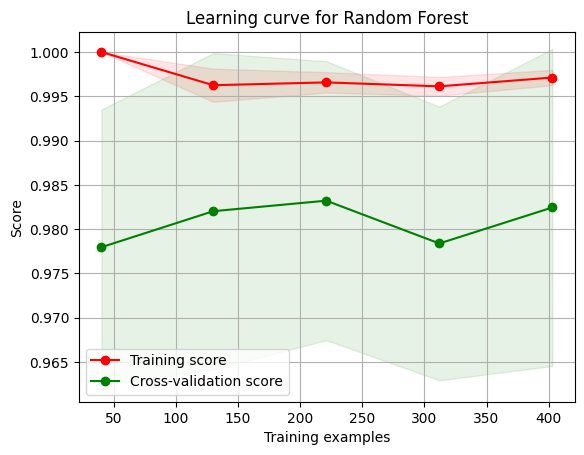

In [42]:
# Vẽ learning curve cho Random Forest
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(rf, x_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5), verbose=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning curve for Random Forest')
plt.legend(loc='best')
plt.grid()
plt.show()

In [43]:
print(train_scores_mean)
print(train_scores_std)
print(test_scores_mean)
print(test_scores_std)

[1.         0.99625212 0.99657127 0.99612386 0.99711743]
[0.         0.00187395 0.00115337 0.00105834 0.00086439]
[0.97796014 0.98202589 0.98321364 0.97838332 0.9824477 ]
[0.015551   0.01784898 0.01575083 0.01545542 0.01790238]
